In [2]:
from __future__ import division
import glob
import xclim as xc
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# paths
geomip_dir = "/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/"
scomip_dir = "/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/"

# read data, only the tropics
# G6sulfur
g6sulfur_files = glob.glob(geomip_dir+"G6sulfur/r1i1p1f2/day/pr/gn/latest/*.nc")
ds_sulfur = xr.open_mfdataset(g6sulfur_files).sel(lat=slice(-20,20))
# G6solar
g6solar_files = glob.glob(geomip_dir+"G6solar/r1i1p1f2/day/pr/gn/latest/*.nc")
ds_solar = xr.open_mfdataset(g6solar_files).sel(lat=slice(-20,20))
# SSP245
ssp245_files = glob.glob(scomip_dir+"ssp245/r1i1p1f2/day/pr/gn/latest/*.nc")
ds_245 = xr.open_mfdataset(ssp245_files).sel(lat=slice(-20,20))
# SSP585
ssp585_files = glob.glob(scomip_dir+"ssp585/r1i1p1f2/day/pr/gn/latest/*.nc")
ds_585 = xr.open_mfdataset(ssp585_files).sel(lat=slice(-20,20))

In [6]:
# calculate RX5day 
rx_sulfur = xc.indicators.icclim.RX5day(ds_sulfur.pr, freq="MS")
rx_solar = xc.indicators.icclim.RX5day(ds_solar.pr, freq="MS")
rx_245 = xc.indicators.icclim.RX5day(ds_245.pr, freq="MS")
rx_585 = xc.indicators.icclim.RX5day(ds_585.pr, freq="MS")

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(


In [4]:
def global_mean(ds):
    lat = ds['lat']
    weight = np.cos(np.deg2rad(lat))
    weight /= weight.mean()
    other_dims = set(ds.dims) - {'time'}
    return (ds * weight).mean(other_dims)

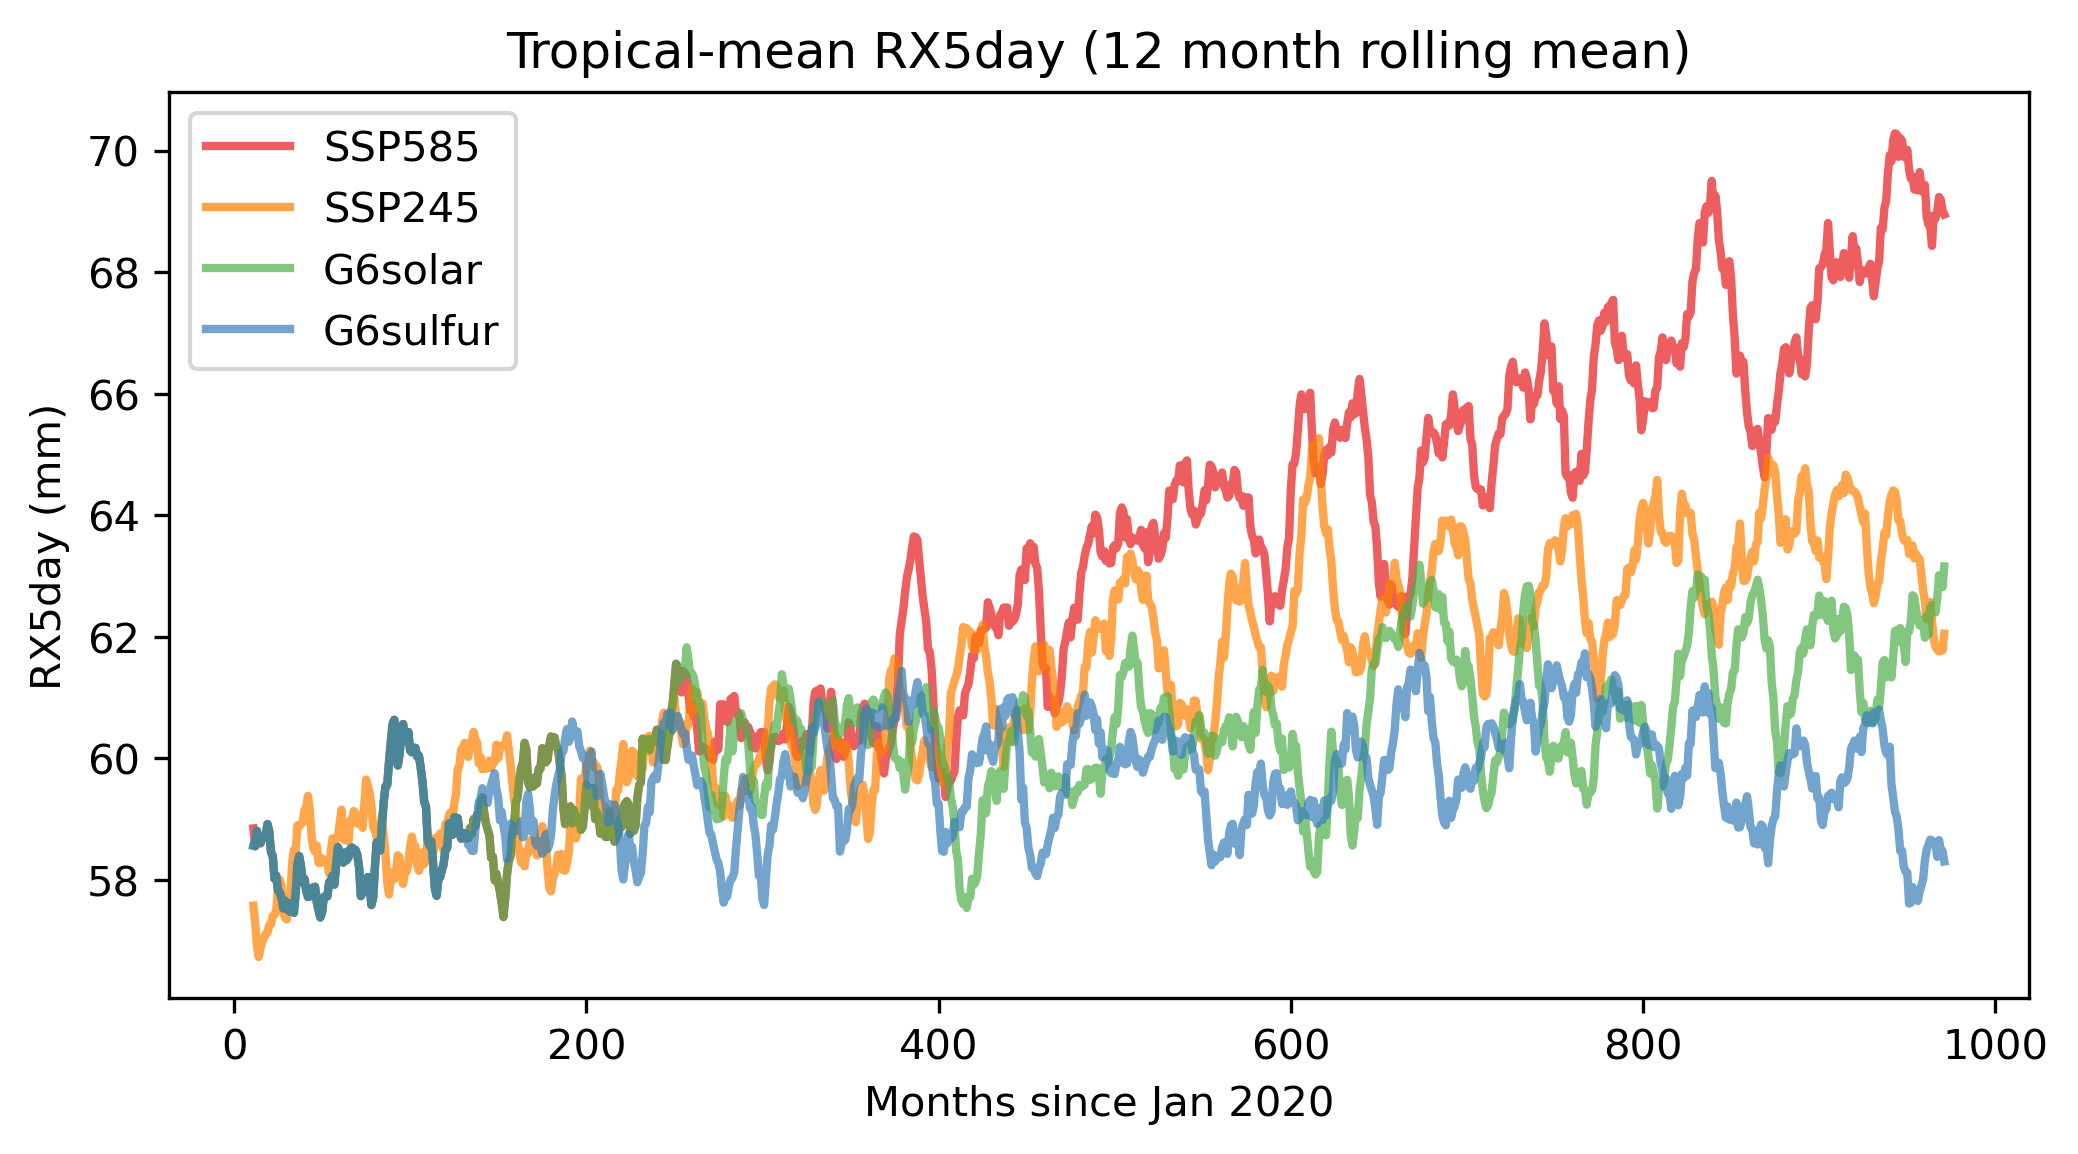

In [13]:
plt.figure(figsize=(8, 4),dpi=300)
plt.plot(global_mean(rx_585.sel(time=slice('2020-01-01','2100-12-30'))).rolling(time=12).mean().values,lw=2,label='SSP585',color="#e41a1c", alpha=0.7)
plt.plot(global_mean(rx_245.sel(time=slice('2020-01-01','2100-12-30'))).rolling(time=12).mean().values,lw=2,label='SSP245', color="#ff7f00", alpha=0.7)
plt.plot(global_mean(rx_solar.sel(time=slice('2020-01-01','2100-12-30'))).rolling(time=12).mean().values,lw=2,label='G6solar', color="#4daf4a", alpha=0.7)
plt.plot(global_mean(rx_sulfur.sel(time=slice('2020-01-01','2100-12-30'))).rolling(time=12).mean().values,lw=2,label='G6sulfur', color="#377eb8", alpha=0.7)
plt.ylabel('RX5day (mm)')
plt.xlabel('Months since Jan 2020')
plt.legend()
plt.title('Tropical-mean RX5day (12 month rolling mean)')

plt.savefig("plots/CMIP6Hackathon/tropical_mean_rx5day_timeseries.png", format="png", dpi=300)

plt.show()